Epoch 1/10
60000/60000 [==============================] - 20s 338us/sample - loss: 0.2011 - acc: 0.9403
Epoch 2/10
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0813 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0524 - acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0367 - acc: 0.9885
Epoch 5/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0266 - acc: 0.9913
Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0732 - acc: 0.9791
Actual Digit = 6
Actual Image...
Recongized Classification :  [3.0768208e-09 5.0187752e-15 3.8868791e-12 2.3467497e-15 1.1544126e-10
 1.3511936e-13 1.0000000e+00 6.9303206e-14 5.5293112e-09 1.8283706e-13]
Probability of recongnized digit (should be ~1):  1.0
Recongized Digit = (6,)
SUCCESS :-)


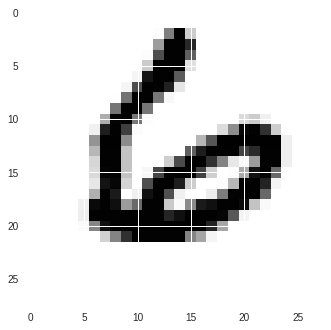

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

# load train and test data set : (image, digit)
(img_train, dig_train),(img_test, dig_test) = mnist.load_data()

# Normalize
img_train, img_test = img_train / 255.0, img_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(img_train, dig_train, epochs=10, callbacks=[callbacks])

# Test model
model.evaluate(img_test, dig_test)

digit_classification = model.predict(img_test)

idx = random.randint(0, len(img_test))

# Expected result
expected_digit = dig_test[idx]
print('Actual Digit =', expected_digit)
print('Actual Image...')
plt.imshow(img_test[idx])

# ML recognized actual result
actual_digit_classification_arr = digit_classification[idx]
print('Recongized Classification : ', actual_digit_classification_arr)
np_cls_arr = np.array(actual_digit_classification_arr)
# Find the index of max probability i.e. the recognized digit
# np.unravel_index() IS MAGICAL METHOD FROM NumPy!!!
# Being only 1-d array, the max idex is single digit
digit_index = np.unravel_index(np_cls_arr.argmax(), np_cls_arr.shape)
actual_digit = digit_index
# Find the probability of recongnized digit. IDEALLY, it should be close to one
actual_digit_prob = np_cls_arr[digit_index]
print('Probability of recongnized digit (should be ~1): ', actual_digit_prob)
print('Recongized Digit =', actual_digit)

if (expected_digit == actual_digit):
  print('SUCCESS :-)')
else:
  print('Failure :-(')

